In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel("rice.xlsx")

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
df.isnull().sum().sum()

np.int64(0)

In [6]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [7]:
df["Class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

<Axes: xlabel='Class', ylabel='count'>

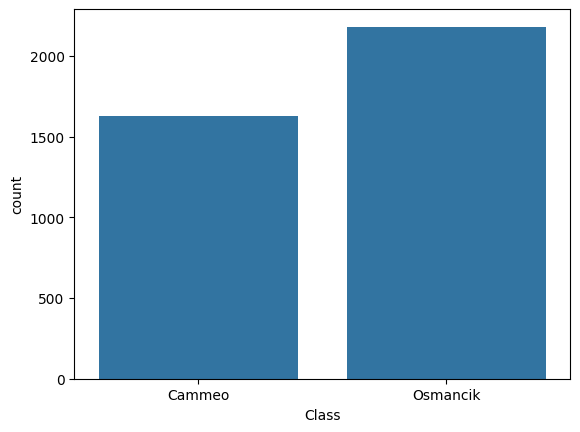

In [8]:
sns.countplot(x="Class",data=df)

In [9]:
df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

In [10]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

<Axes: xlabel='Area', ylabel='Perimeter'>

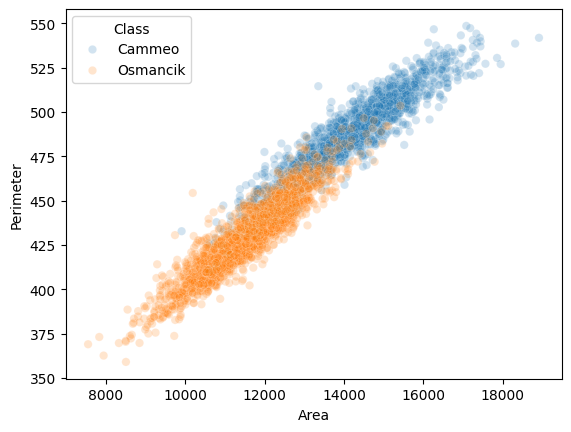

In [11]:
sns.scatterplot(x="Area",y="Perimeter",data=df,alpha=0.2,hue="Class") #soluklaştırmak için alpha kullanıldı.

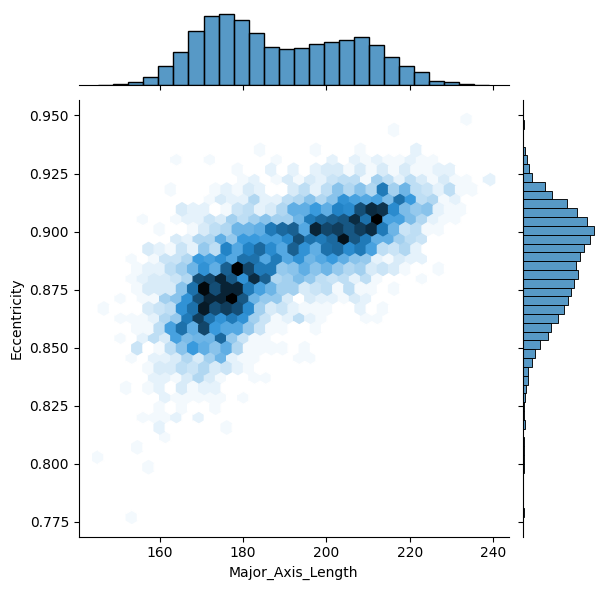

In [12]:
sns.jointplot(kind="hex",x="Major_Axis_Length",y="Eccentricity",data=df)

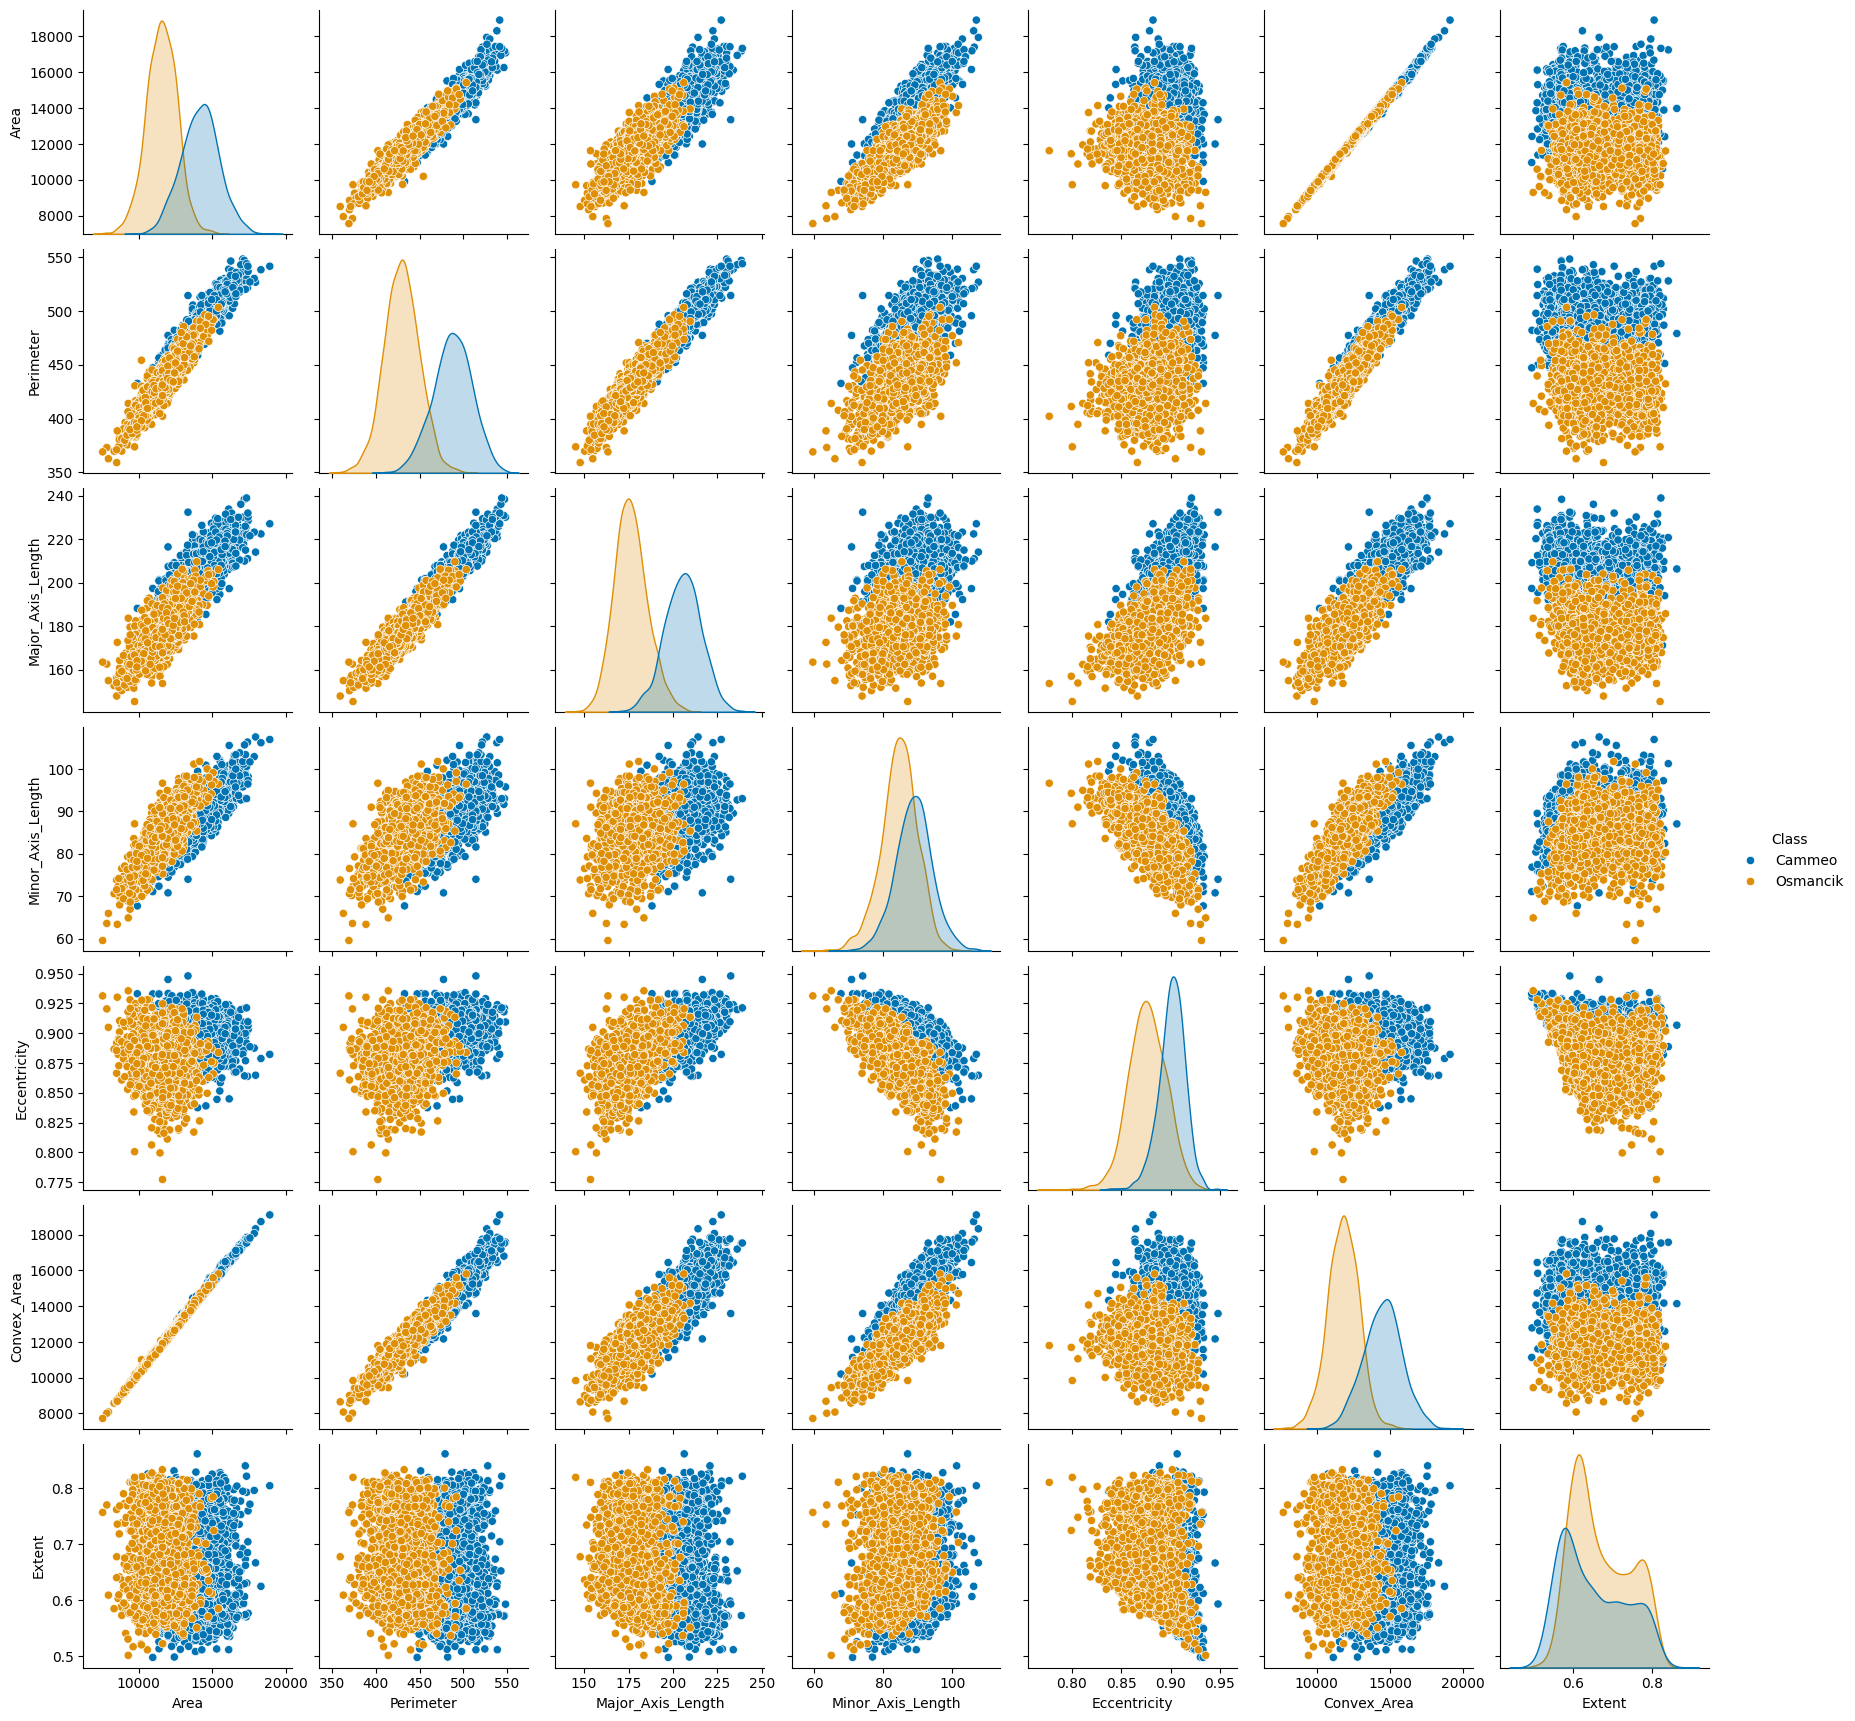

In [13]:
sns.pairplot(df,hue="Class",palette="colorblind")

In [15]:
df.corr(numeric_only=True)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


<Axes: >

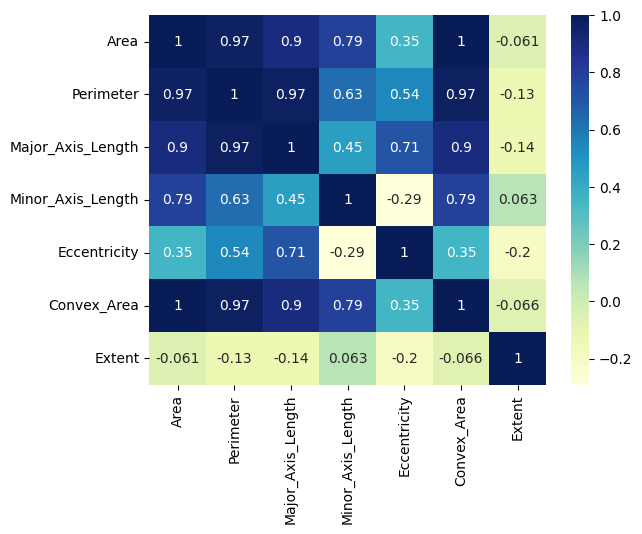

In [17]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="YlGnBu")

## Train Test Split

In [19]:
X=df.drop("Class",axis=1)
y=pd.get_dummies(df["Class"],drop_first=True)

In [20]:
y

,Osmancik
0,False
1,False
2,False
3,False
4,False
...,...
3805,True
3806,True
3807,True
3808,True


In [21]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=9,test_size=0.1) #veri büyük olduğundan.

## Hiper Orman

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [25]:
n_est=[9,64,128,200]
max_feat=[1,2,3,4]
bootstrap_sec=[True,False] #False için her ağaç verisi kullanılır.
oob=[True,False] #Seçilen verilerin dışında veri eklenip eklenmeyeceği kontrolü


In [26]:
parameters={
    "n_estimators":n_est,
    "max_features":max_feat,
    "bootstrap":bootstrap_sec,
    "oob_score":oob
}

In [27]:
random_forest=RandomForestClassifier()

In [28]:
grid=GridSearchCV(random_forest,parameters)

In [29]:
grid.fit(X_train,y_train)

/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [30]:
grid.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)

In [38]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [31]:
pilav_pred=grid.predict(X_test)

## Değerlendirme

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

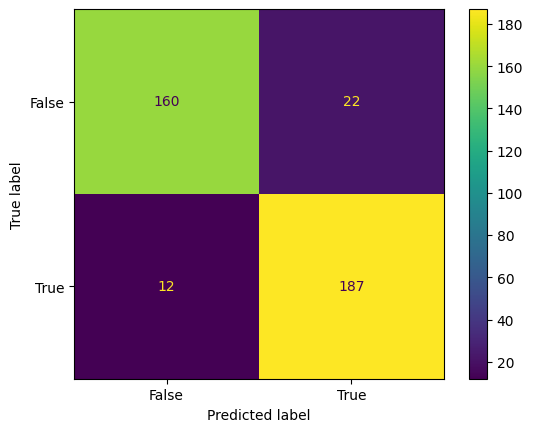

In [34]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

In [35]:
print(classification_report(y_test,pilav_pred))

              precision    recall  f1-score   support

       False       0.93      0.88      0.90       182
        True       0.89      0.94      0.92       199

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381



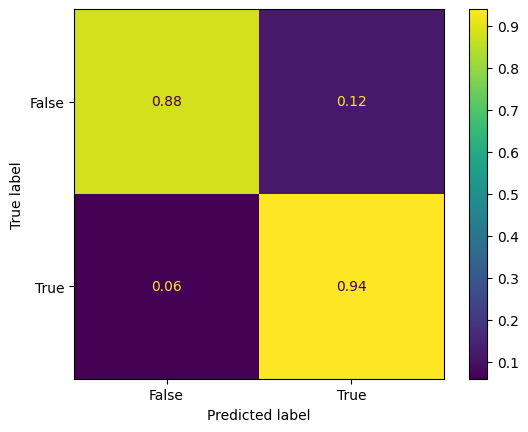

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test,normalize="true") #yüzdelik olarak değerlendiriyor.

## Estimator Sayısı Belirleme

In [39]:
from sklearn.metrics import accuracy_score

In [43]:
hata_payi=[]
yanlis_secim=[]

for n in range(1,128):
    rand_forest_class=RandomForestClassifier(n_estimators=n,bootstrap=True,oob_score=False,max_features=1)
    rand_forest_class.fit(X_train,y_train)
    pirinc_pred=rand_forest_class.predict(X_test)
    error=1-accuracy_score(pirinc_pred,y_test)

    sample=y_test.to_numpy()
    sample=sample.reshape(-1,1)[0]

    n_missed=np.sum(pirinc_pred!=sample)
    hata_payi.append(error)
    yanlis_secim.append(n_missed)

/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/emir/Veri-ve-Makine-Ogrenmesi/.venv/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarni